<a href="https://colab.research.google.com/github/EnsiyehRaoufi/ML_Models_Linear_treebased_XGBoost__AutoGluon/blob/main/AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup**

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 1.7 MB 31.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 953 kB 29.7 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.0
    Uninstalling wheel-0.37.0:
      Successfully uninstalled wheel-0.37.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 47.3 MB 1.5 MB/s             
     |████████████████████████████████| 8.6 MB 49.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=d399fd9f726bb38a370398092d41dec91bf96a6906947109872d3510f050ad84
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you h

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor


# **AutoGluon Classifier**

In [2]:
# Load in the wine dataset
wine = datasets.load_wine()

In [3]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df["target"] = wine["target"]

In [4]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [5]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
    train_data=df_train, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211230_205135/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211230_205135/"
AutoGluon Version:  0.3.1
Train Data Rows:    142
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12546.34 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each f

In [7]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.992958       0.452725  42.387202                0.000477           0.335997            2       True         14
1   RandomForestGini_BAG_L1   0.985915       0.127118   0.761085                0.127118           0.761085            1       True          6
2    NeuralNetFastAI_BAG_L1   0.985915       0.349982  28.214206                0.349982          28.214206            1       True          3
3           CatBoost_BAG_L1   0.978873       0.046151   7.586718                0.046151           7.586718            1       True          8
4         LightGBMXT_BAG_L1   0.978873       0.058810   4.203668                0.058810           4.203668            1       True          4
5           LightGBM_BAG_L1   0.978873       0.064948   5.027497                

{'leaderboard':                       model  score_val  ...  can_infer  fit_order
 0       WeightedEnsemble_L2   0.992958  ...       True         14
 1   RandomForestGini_BAG_L1   0.985915  ...       True          6
 2    NeuralNetFastAI_BAG_L1   0.985915  ...       True          3
 3           CatBoost_BAG_L1   0.978873  ...       True          8
 4         LightGBMXT_BAG_L1   0.978873  ...       True          4
 5           LightGBM_BAG_L1   0.978873  ...       True          5
 6     ExtraTreesEntr_BAG_L1   0.978873  ...       True         10
 7     ExtraTreesGini_BAG_L1   0.978873  ...       True          9
 8   RandomForestEntr_BAG_L1   0.978873  ...       True          7
 9     NeuralNetMXNet_BAG_L1   0.978873  ...       True         12
 10     LightGBMLarge_BAG_L1   0.964789  ...       True         13
 11           XGBoost_BAG_L1   0.964789  ...       True         11
 12    KNeighborsDist_BAG_L1   0.711268  ...       True          2
 13    KNeighborsUnif_BAG_L1   0.661972  ...   

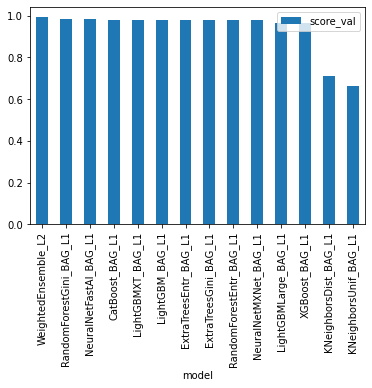

In [8]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [9]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9722222222222222
Evaluations on test data:
{
    "accuracy": 0.9722222222222222,
    "balanced_accuracy": 0.9791666666666666,
    "mcc": 0.9572184238576891
}


# **AutoGluon Regression**

In [10]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [11]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [12]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [13]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# Since we are using a different eval_metric, we'll need to assign the problem_type
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211230_205409/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211230_205409/"
AutoGluon Version:  0.3.1
Train Data Rows:    353
Train Data Columns: 10
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11934.76 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenera

In [14]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.548901       2.919671  67.336462                0.000574           0.376329            2       True         12
1        LightGBMXT_BAG_L1   0.548364       0.054554   7.272776                0.054554           7.272776            1       True          3
2          LightGBM_BAG_L1   0.526471       0.050374   5.973805                0.050374           5.973805            1       True          4
3          CatBoost_BAG_L1   0.523150       0.033012   6.404124                0.033012           6.404124            1       True          6
4   NeuralNetFastAI_BAG_L1   0.503525       0.332816  14.689872                0.332816          14.689872            1       True          8
5     ExtraTreesMSE_BAG_L1   0.502246       0.101804   0.631484                0.10180

{'leaderboard':                      model  score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L2   0.548901  ...       True         12
 1        LightGBMXT_BAG_L1   0.548364  ...       True          3
 2          LightGBM_BAG_L1   0.526471  ...       True          4
 3          CatBoost_BAG_L1   0.523150  ...       True          6
 4   NeuralNetFastAI_BAG_L1   0.503525  ...       True          8
 5     ExtraTreesMSE_BAG_L1   0.502246  ...       True          7
 6    NeuralNetMXNet_BAG_L1   0.495572  ...       True         10
 7     LightGBMLarge_BAG_L1   0.474294  ...       True         11
 8   RandomForestMSE_BAG_L1   0.466743  ...       True          5
 9           XGBoost_BAG_L1   0.452164  ...       True          9
 10   KNeighborsDist_BAG_L1   0.439701  ...       True          2
 11   KNeighborsUnif_BAG_L1   0.430521  ...       True          1
 
 [12 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'CatBoost_BAG_L1': 

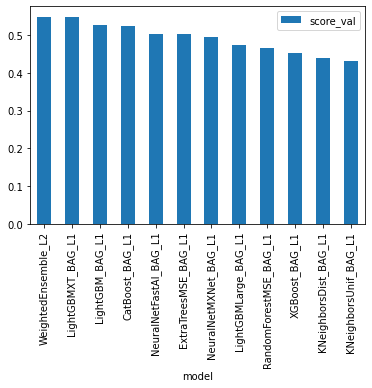

In [15]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [16]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.3279852119707779
Evaluations on test data:
{
    "r2": 0.3279852119707779,
    "root_mean_squared_error": -58.70300499720574,
    "mean_squared_error": -3446.0427957019615,
    "mean_absolute_error": -44.6239285415478,
    "pearsonr": 0.5871965210160189,
    "median_absolute_error": -36.88018798828125
}
